<a href="https://colab.research.google.com/github/Ramanujpandey05/Bharat_Intern_Data_Science_Internship/blob/main/SMS_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
import pandas as pd

#List of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv'    #change this to the path of your csv file
#Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding = encoding)
        print(f"file successfully read with encoding: {encoding}")
        break #stop the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue #Try the next encoding

# If the loop completes without success, df will not be defined
if 'df' in locals():
    print("CSV file has been successfuklly loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")


Failed to read with encoding: utf-8
file successfully read with encoding: latin1
CSV file has been successfuklly loaded.


In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
 df.sample(5)  #Random sample, ham i.e. not spam message

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4852,ham,I'm fine. Hope you are also,NaN,NaN,NaN
594,ham,I met you as a stranger and choose you as my f...,NaN,NaN,NaN
3267,ham,Which is why i never wanted to tell you any of...,NaN,NaN,NaN
44,ham,Great! I hope you like your man well endowed. ...,NaN,NaN,NaN
1629,ham,Sounds like you have many talents! would you l...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [8]:
# ---------------------DATA CLEANING---------------------

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
#Drop last 3 columns
df.drop(columns =  ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [11]:
df.sample

<bound method NDFrame.sample of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [12]:
#renaming  the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5283,ham,"Yeah, probably here for a while"
4413,ham,How stupid to say that i challenge god.You don...
1433,ham,You intrepid duo you! Have a great time and se...
646,ham,Do you mind if I ask what happened? You dont h...
2523,ham,"Sorry, I'll call later"


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['target'] = encoder.fit_transform(df['target']) #Changing spam and ham in 0 and 1

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#Missing Values
df.isnull().sum()


target    0
text      0
dtype: int64

In [17]:
#Now to check for the Duplicate values
df.duplicated().sum()

403

In [18]:
#remove the duplicates
df = df.drop_duplicates(keep = "first")

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape #reduces from(5572,2)

(5169, 2)

In [21]:
#---------------------EDA-----------------

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

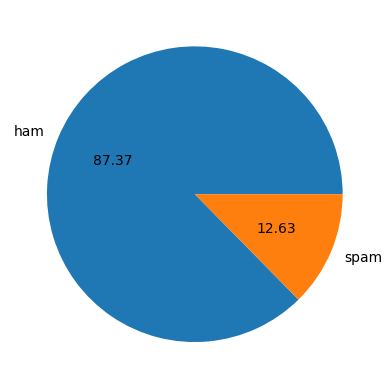

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
#Big chunk of ham and very less spam so out data is not balanced


In [26]:
import nltk  #Natural language toolkit

#helps to seperate out our data in form of different characters, different configuration or probably different sentences or words

In [27]:
!pip install nlt

ERROR: Could not find a version that satisfies the requirement nlt (from versions: none)
ERROR: No matching distribution found for nlt


In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
df['num_characters'] = df['text'].apply(len) #number of char

<ipython-input-29-fcce1fa0b5cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len) #number of char


In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))#words count

<ipython-input-31-12e50fced2ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))#words count


In [32]:
df.head()  #New column is added

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))#sentence

<ipython-input-33-ae3fcfd2d2bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))#sentence


In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
#describing those new columns again
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#targeting ham=0
df[df['target'] ==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#targeting ham=0
df[df['target'] ==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

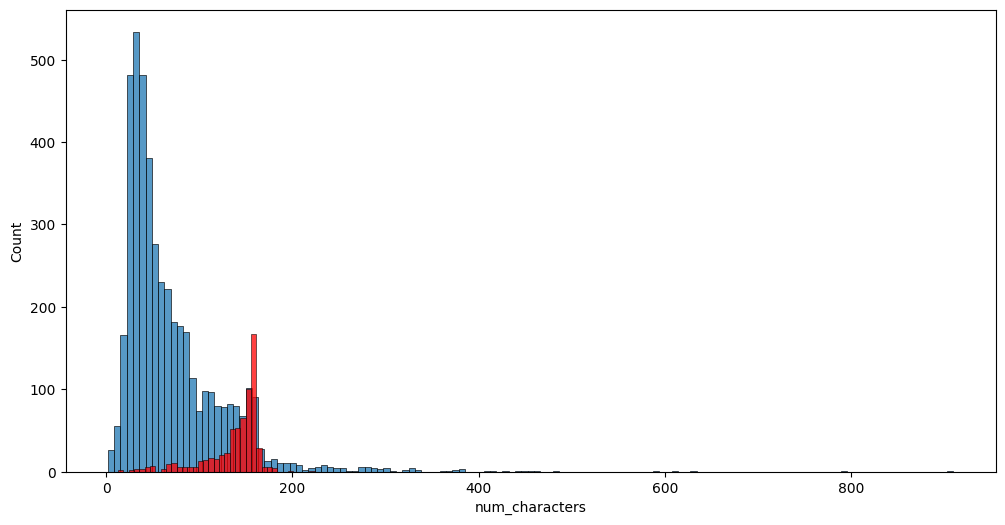

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

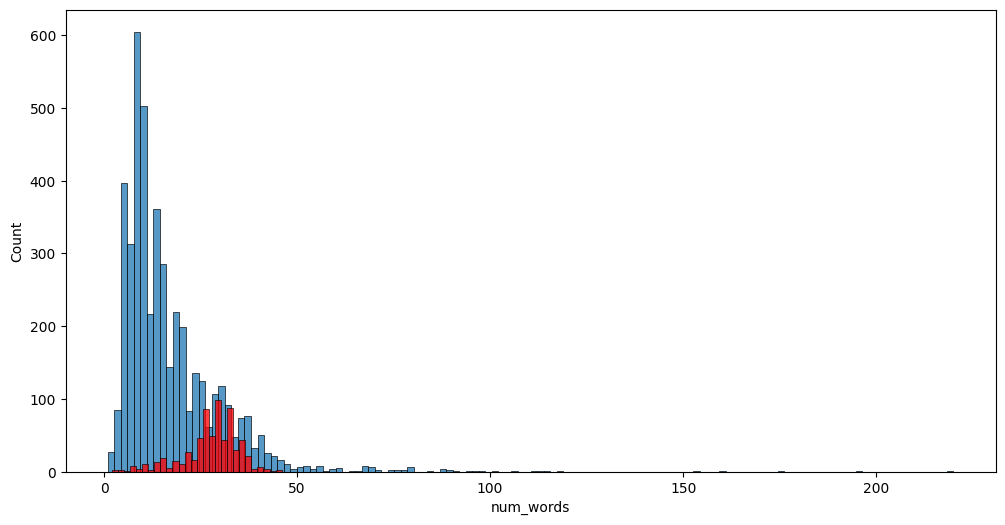

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

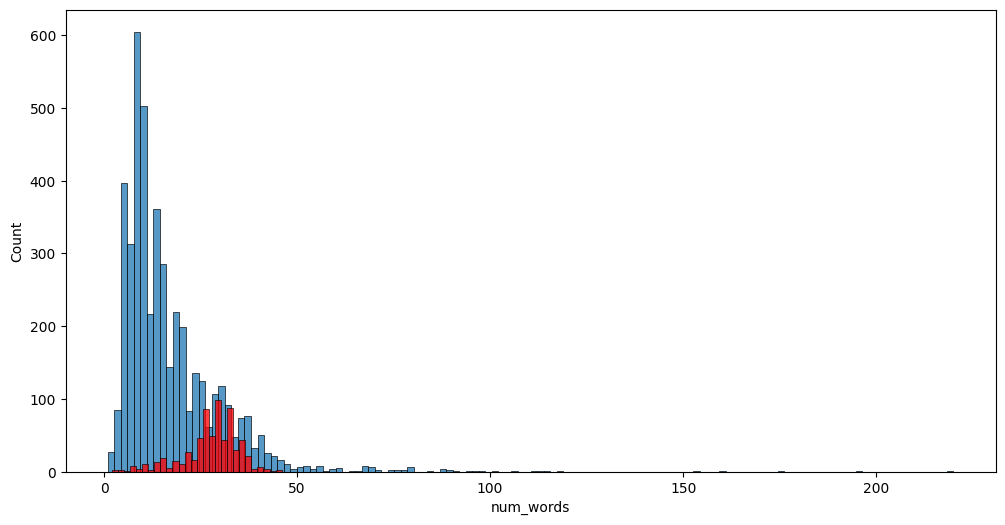

In [43]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

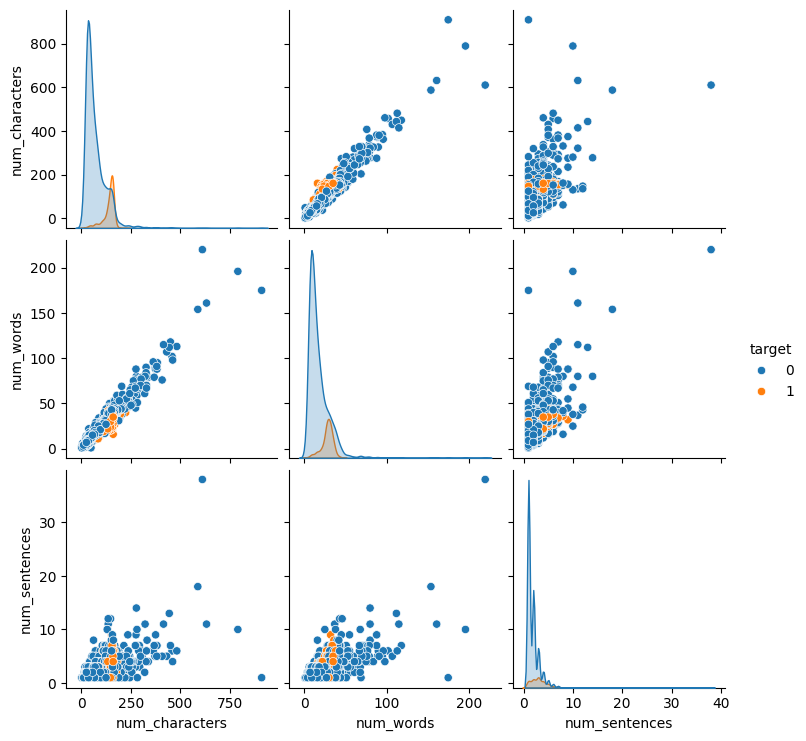

In [44]:
 sns.pairplot(df,hue='target')

In [45]:
numeric_df = df.select_dtypes(include=[np.number])

In [46]:
corr_matrix = numeric_df.corr()

<Axes: >

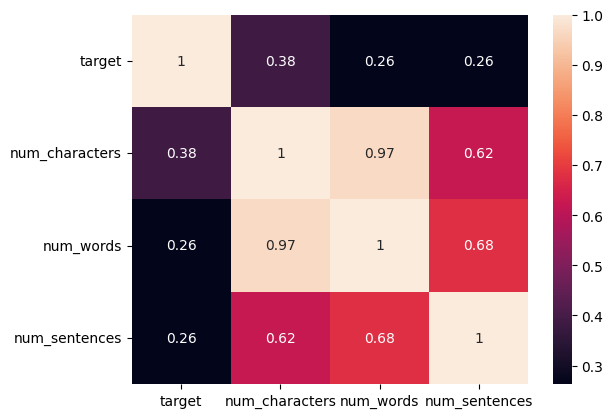

In [47]:
sns.heatmap(numeric_df.corr(),annot=True)

In [48]:
#-----------------DATA PROCESSING------------------

In [49]:
#-Lower case
#-Tokenization
#-Removing special characters
#-Removing stop words and punctuations
#-Stemming


In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') #You may need to download the stopwords dataset

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight")

print(transformed_text)


#gives words only that thinks necessary


gon na home soon want talk stuff anymor tonight


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [52]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [53]:
df['transformed_text'] = df['text'].apply(transform_text)

<ipython-input-53-b507aa02865d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

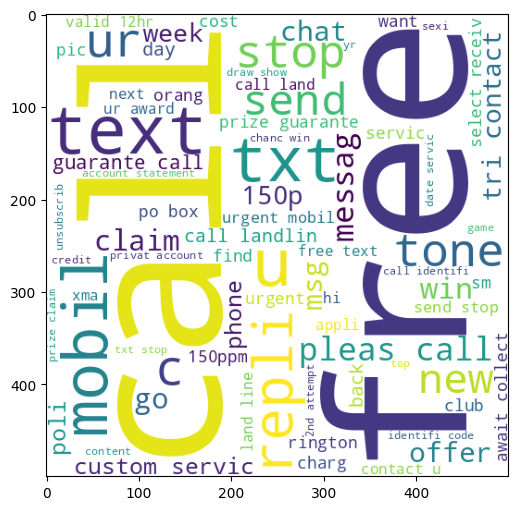

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

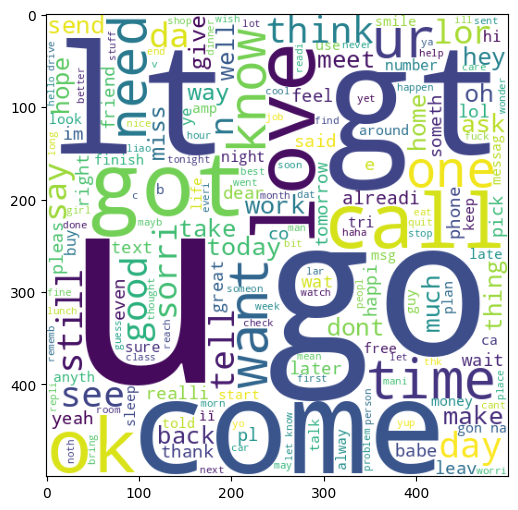

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
#it will tell you what are the total no. of words or character you have in spam database
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9939

In [63]:
# Assuming spam_corpus is a list or similar iterable
counter = Counter(spam_corpus)
common_elements = counter.most_common(30)
df_common = pd.DataFrame(common_elements, columns=['Element', 'Count'])

# Create barplot
sns.barplot(x='Element', y='Count', data=df_common)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show plot
plt.show()

NameError: name 'Counter' is not defined

In [64]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
len(ham_corpus)

35404

In [66]:
# Assuming ham_corpus is a list or similar iterable
counter = Counter(ham_corpus)
common_elements = counter.most_common(30)
df_common = pd.DataFrame(common_elements, columns=['Element', 'Count'])

# Create barplot
sns.barplot(x='Element', y='Count', data=df_common)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show plot
plt.show()

NameError: name 'Counter' is not defined

In [67]:
#Text vectorization
#using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
#---------------BUILDING THE MODEL----------------

In [70]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
#from sklearn.preprocessing import MinMaxScaler
#scalar = MinMaxScaler()
#X = scaler.fit_transform(X)

In [73]:
# appending the num_character col to x
#X = np.hstack ((X,df['num_characters'].values.reshape(-1,1)))

In [74]:
X.shape

(5169, 3000)

In [75]:
y = df['target'].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [79]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [80]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [81]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [82]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [83]:
#tfidf --> MNB ()

In [84]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [85]:
# Now a call to all ML model

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [87]:
#Listed it down and classified it

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc =LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [88]:
clfs = {
    'SVC' : svc,
    'KN'  : knc,
    'NB'  : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb


}

In [89]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [90]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy -  ",current_accuracy)
    print("Precision -  ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For  SVC
Accuracy -   0.9758220502901354
Precision -   0.9747899159663865
For  KN
Accuracy -   0.9052224371373307
Precision -   1.0
For  NB
Accuracy -   0.9709864603481625
Precision -   1.0
For  DT
Accuracy -   0.9294003868471954
Precision -   0.8282828282828283
For  LR
Accuracy -   0.9584139264990329
Precision -   0.9702970297029703
For  RF
Accuracy -   0.9758220502901354
Precision -   0.9829059829059829
For  AdaBoost
Accuracy -   0.960348162475822
Precision -   0.9292035398230089
For  BgC
Accuracy -   0.9584139264990329
Precision -   0.8682170542635659
For  ETC
Accuracy -   0.9748549323017408
Precision -   0.9745762711864406
For  GBDT
Accuracy -   0.9468085106382979
Precision -   0.9191919191919192
For  xgb
Accuracy -   0.9671179883945842
Precision -   0.9262295081967213


In [92]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [93]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
#Again checking the performance of all algorithm
performance_df1

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
       hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [94]:
#model improve
#!> Change the max_features parameter of TfIdf

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores }).sort_values('Precision_max_ft_3000',ascending=False)

In [97]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [98]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [96]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores }).sort_values('Precision_num_chars',ascending=False)

In [100]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_num_chars_x,Precision_num_chars_x,Accuracy_num_chars_y,Precision_num_chars_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [101]:
voting=  VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

NameError: name 'VotingClassifier' is not defined

In [102]:
voting=  VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

NameError: name 'VotingClassifier' is not defined

In [ ]:
voting.fit(X_train,y_train)

In [ ]:
y_pred= voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [103]:
#Applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()


In [104]:
from sklearn.ensemble import StackingClassifier

In [105]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [106]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [107]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [108]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#Sample text data and corresponding labels(replace with your actual data)
X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0,1,0] #Example labels(0 for negative, 1 for positive)

#Craete and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

#Create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

#Save the trained TF -IDF vectorizer and Naive Bayes Model to files
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb,model_file)

